In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Embedding, LSTM
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/POWER_Point_Daily_20190101_20211002_039d0897N_094d5622W_LST.csv")
df1 = pd.read_csv("/content/sample_data/POWER_Point_Daily_20210101_20210930_028d6273N_077d2190E_LST.csv")

In [4]:
df.head()

,YEAR,MO,DY,PS,WS10M,WS50M,PRECTOTCORR,QV2M,TS,T2MDEW,T2M,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,2019,1,1,99.53,4.12,5.10,0.04,1.89,-5.45,-9.02,-5.97,0.13,0.20,113.80,36.27
1,2019,1,2,99.04,3.98,5.76,0.00,1.95,-5.99,-8.60,-5.67,0.29,0.19,119.26,108.83
2,2019,1,3,98.53,2.56,3.88,0.05,2.56,-3.49,-5.60,-1.99,0.27,0.19,119.85,121.86
3,2019,1,4,97.96,3.16,5.29,0.01,3.60,-0.25,-1.28,1.60,-999.00,0.18,117.66,119.74
4,2019,1,5,98.38,3.09,4.72,0.00,4.64,1.91,2.44,2.85,0.31,0.18,115.17,110.75


In [5]:
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)
df1.drop(df1.columns[[0, 1, 2]], axis = 1, inplace = True)

In [6]:
df.head()

,PS,WS10M,WS50M,PRECTOTCORR,QV2M,TS,T2MDEW,T2M,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,99.53,4.12,5.10,0.04,1.89,-5.45,-9.02,-5.97,0.13,0.20,113.80,36.27
1,99.04,3.98,5.76,0.00,1.95,-5.99,-8.60,-5.67,0.29,0.19,119.26,108.83
2,98.53,2.56,3.88,0.05,2.56,-3.49,-5.60,-1.99,0.27,0.19,119.85,121.86
3,97.96,3.16,5.29,0.01,3.60,-0.25,-1.28,1.60,-999.00,0.18,117.66,119.74
4,98.38,3.09,4.72,0.00,4.64,1.91,2.44,2.85,0.31,0.18,115.17,110.75


In [7]:
df = df[df.ALLSKY_SFC_UV_INDEX != -999]
df1 = df1[df1.ALLSKY_SFC_UV_INDEX != -999]

In [8]:
df.head()

,PS,WS10M,WS50M,PRECTOTCORR,QV2M,TS,T2MDEW,T2M,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,99.53,4.12,5.10,0.04,1.89,-5.45,-9.02,-5.97,0.13,0.20,113.80,36.27
1,99.04,3.98,5.76,0.00,1.95,-5.99,-8.60,-5.67,0.29,0.19,119.26,108.83
2,98.53,2.56,3.88,0.05,2.56,-3.49,-5.60,-1.99,0.27,0.19,119.85,121.86
4,98.38,3.09,4.72,0.00,4.64,1.91,2.44,2.85,0.31,0.18,115.17,110.75
5,98.01,6.59,10.04,0.08,6.10,6.12,6.05,7.28,0.22,0.19,109.87,40.63


In [9]:
df.shape

(854, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 881
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PS                   854 non-null    float64
 1   WS10M                854 non-null    float64
 2   WS50M                854 non-null    float64
 3   PRECTOTCORR          854 non-null    float64
 4   QV2M                 854 non-null    float64
 5   TS                   854 non-null    float64
 6   T2MDEW               854 non-null    float64
 7   T2M                  854 non-null    float64
 8   ALLSKY_SFC_UV_INDEX  854 non-null    float64
 9   ALLSKY_SRF_ALB       854 non-null    float64
 10  CLRSKY_SFC_SW_DWN    854 non-null    float64
 11  ALLSKY_SFC_SW_DWN    854 non-null    float64
dtypes: float64(12)
memory usage: 86.7 KB


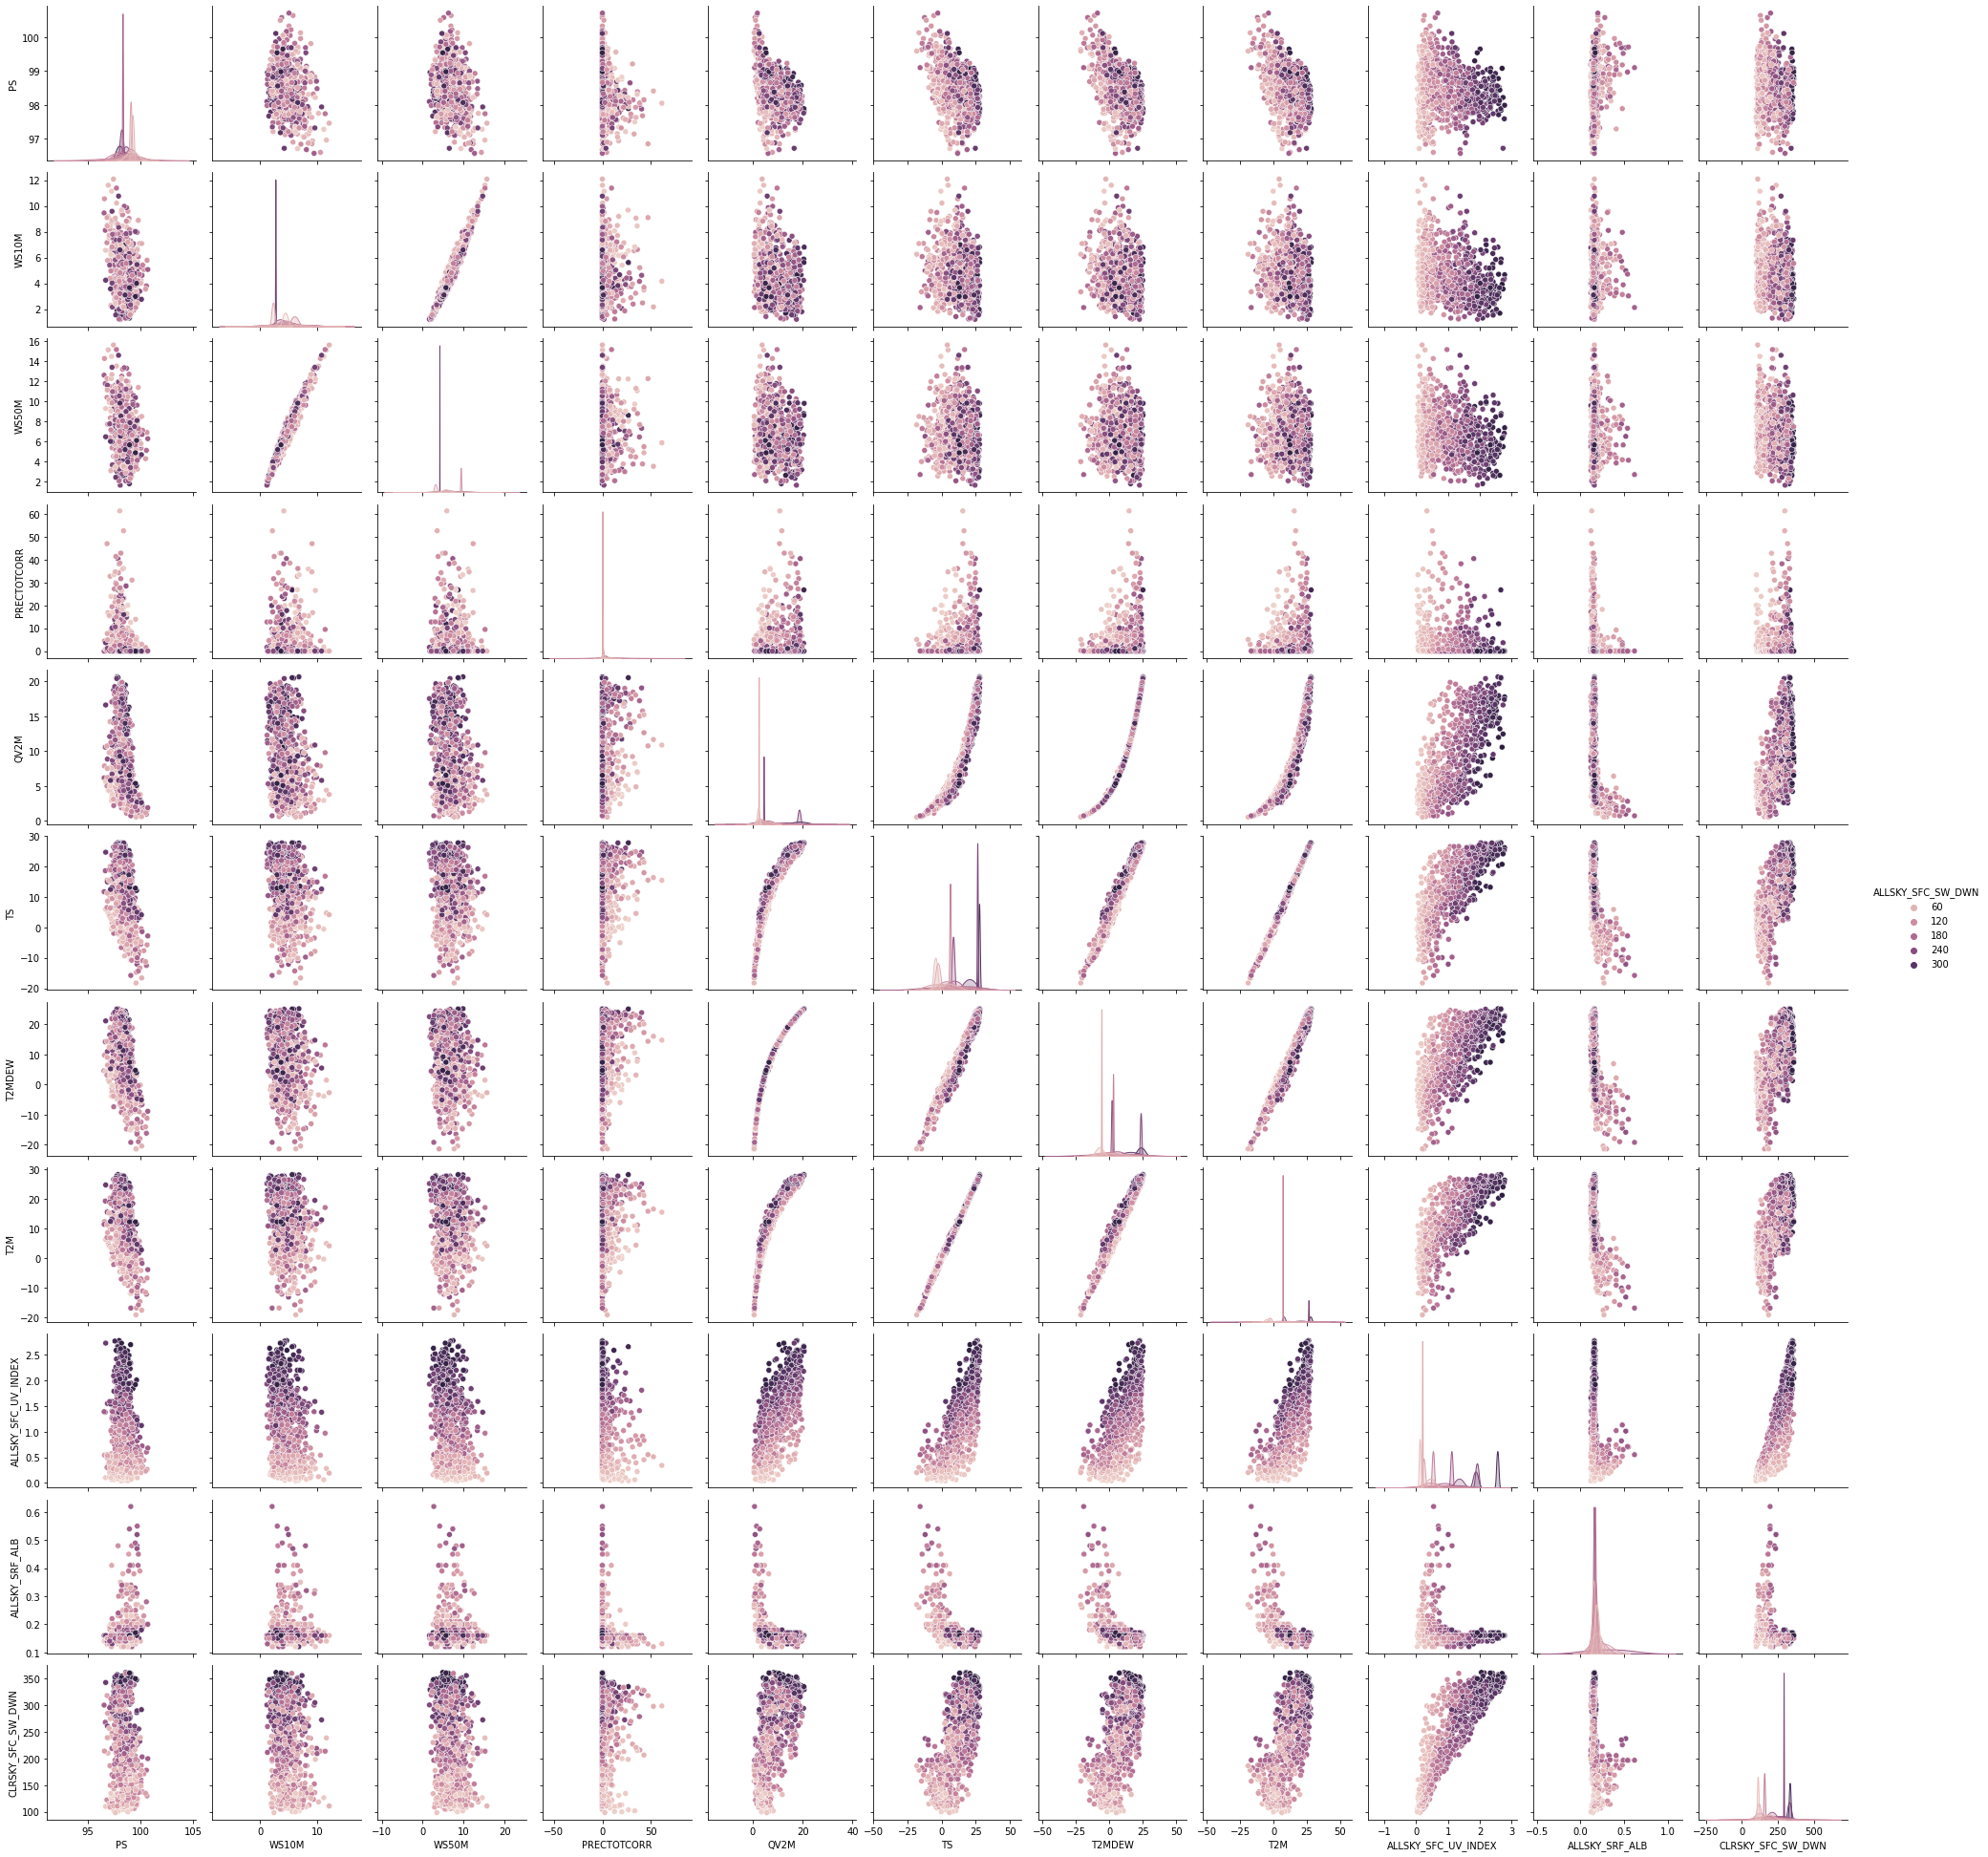

In [11]:
sns.pairplot(df, hue='ALLSKY_SFC_SW_DWN')

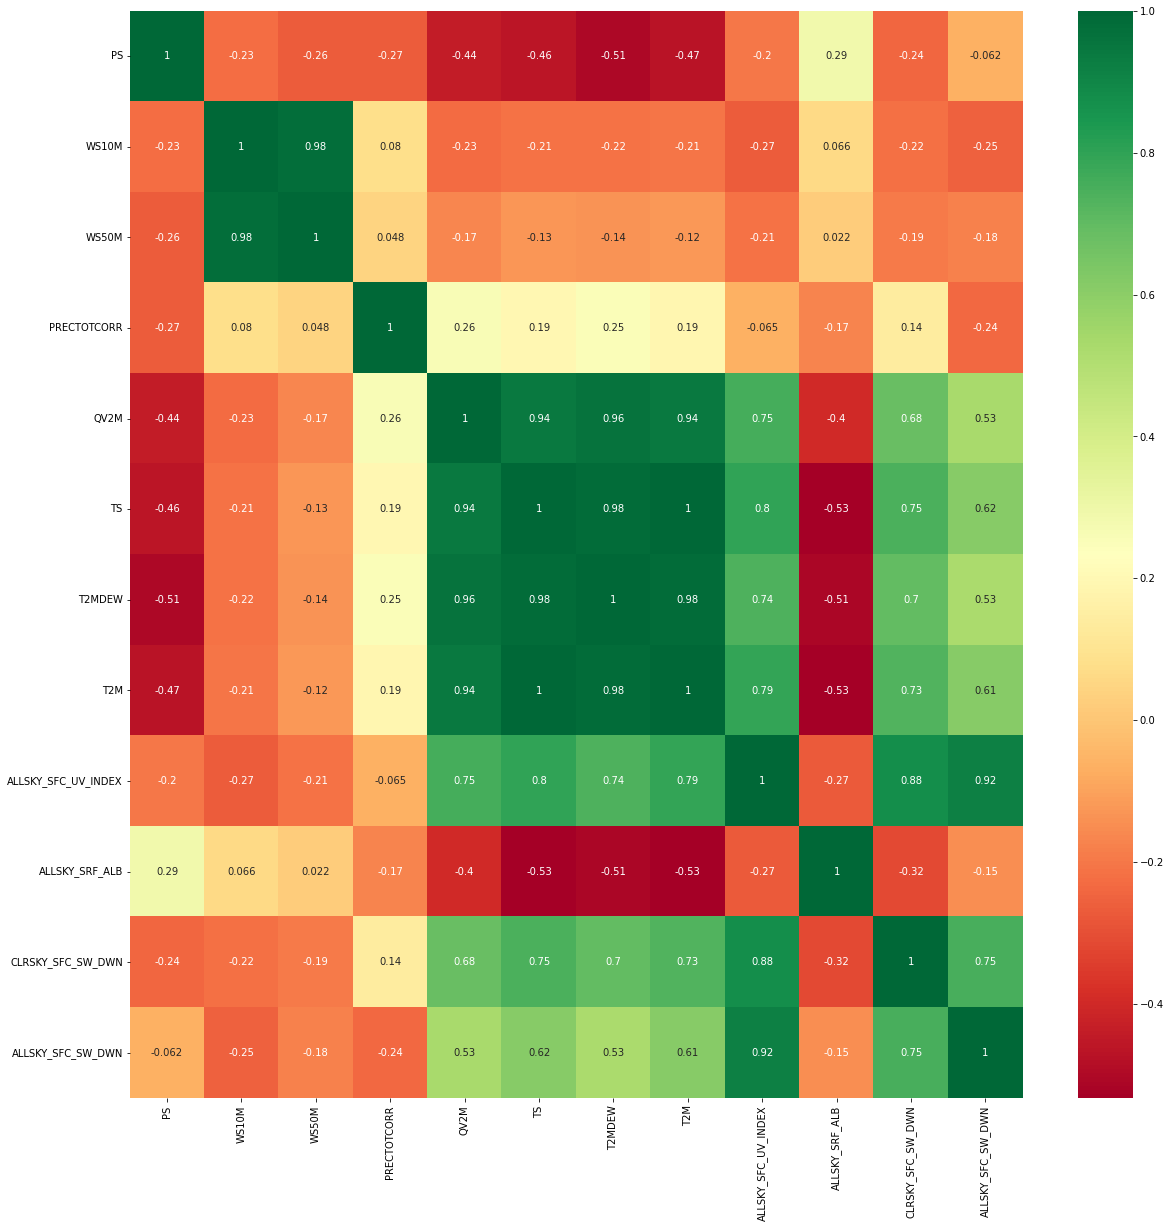

In [12]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
df.drop(df.columns[[2, 4, 6, 7]], axis = 1, inplace = True)
df1.drop(df1.columns[[2, 4, 6, 7]], axis = 1, inplace = True)

In [14]:
df.head()

,PS,WS10M,PRECTOTCORR,TS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,99.53,4.12,0.04,-5.45,0.13,0.20,113.80,36.27
1,99.04,3.98,0.00,-5.99,0.29,0.19,119.26,108.83
2,98.53,2.56,0.05,-3.49,0.27,0.19,119.85,121.86
4,98.38,3.09,0.00,1.91,0.31,0.18,115.17,110.75
5,98.01,6.59,0.08,6.12,0.22,0.19,109.87,40.63


In [15]:
df.shape

(854, 8)

In [16]:
input_train, input_test = train_test_split(df, test_size=0.2, random_state=123)

In [17]:
scalar = StandardScaler()
scaled = scalar.fit_transform(input_train)

scaledtest = scalar.transform(input_test)
scaledtest1 = scalar.transform(df1)

In [18]:
nn_input_train = scaled[:,:-1]
nn_input_test = scaledtest[:,:-1]
nn_target_train = scaled[:,-1]
nn_target_test = scaledtest[:,-1]

In [19]:
inputs = keras.Input(shape = (7,))
x = layers.Dense(16, activation='relu')(inputs)
x = layers.Dense(4)(x)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


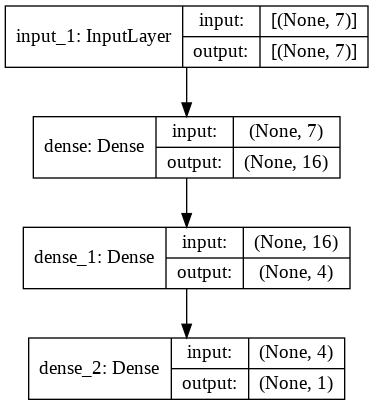

In [20]:
keras.utils.plot_model(model, show_shapes=True)

In [21]:
history = model.fit(nn_input_train, nn_target_train, epochs = 100, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 2.1363 - mae: 1.2562
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 1.5234 - mae: 1.0480
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 1.1097 - mae: 0.8843
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8279 - mae: 0.7514
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6287 - mae: 0.6434
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4938 - mae: 0.5658
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3995 - mae: 0.5102
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3352 - mae: 0.4712
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2870 - mae: 0.4363
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2590 - mae: 0.4130
Epoch 11/100
22/22 [==============================] - 0s 1m

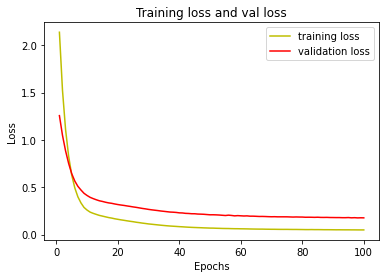

In [22]:
loss = history.history['loss']
val_loss = history.history['mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training loss and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [23]:
def mse(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2) 

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
test = np.array(input_test['ALLSKY_SFC_SW_DWN'])
test1 = np.array(df1['ALLSKY_SFC_SW_DWN'])

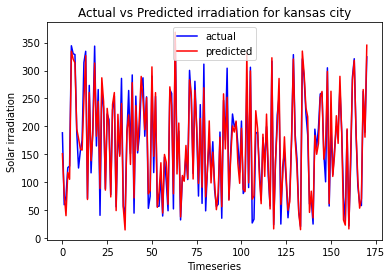

In [25]:
forecast = model.predict(nn_input_test)
forecast = np.repeat(forecast, 8, axis = -1)
predict = scalar.inverse_transform(forecast)

plt.plot(test,  'b', label='actual')
plt.plot(predict[:, -1], 'r', label='predicted')
plt.title('Actual vs Predicted irradiation for kansas city')
plt.xlabel('Timeseries')
plt.ylabel('Solar irradiation')
plt.legend()
plt.show()

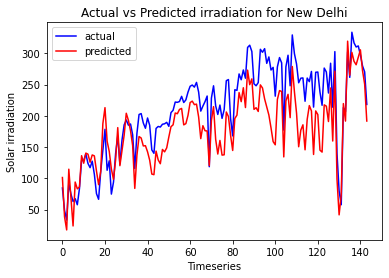

In [26]:
forecast1 = model.predict(scaledtest1[:, :-1])
forecast1 = np.repeat(forecast1, 8, axis = -1)
predict1 = scalar.inverse_transform(forecast1)

plt.plot(test1,  'b', label='actual')
plt.plot(predict1[:, -1], 'r', label='predicted')
plt.title('Actual vs Predicted irradiation for New Delhi')
plt.xlabel('Timeseries')
plt.ylabel('Solar irradiation')
plt.legend()
plt.show()

In [27]:
print("mse score for kansas city: ", mse(test, predict[:, -1]))
print("mape score for kansas city: ", mape(test, predict[:, -1]))
print("r2 score for kansas city: ", r2_score(test, predict[:, -1]))

print("mse score for New Delhi: ", mse(test1, predict1[:, -1]))
print("mape score for New Delhi: ", mape(test1, predict1[:, -1]))
print("r2 score for New Delhi: ", r2_score(test1, predict1[:, -1]))

mse score for kansas city:  462.90211468416896
mape score for kansas city:  16.206588286526166
r2 score for kansas city:  0.9442990130061363
mse score for New Delhi:  2013.5148656097235
mape score for New Delhi:  19.30346485400335
r2 score for New Delhi:  0.6055229149095114


In [28]:
prediction = pd.DataFrame(predict[:, -1], columns=['predictions']).to_csv('prediction.csv')
prediction1 = pd.DataFrame(predict1[:, -1], columns=['predictions']).to_csv('prediction1.csv')

In [29]:
dff = pd.read_csv('/content/prediction.csv')
dff1 = pd.read_csv('/content/prediction1.csv')

In [30]:
dff['actual'] = test
dff1['actual'] = test1

In [31]:
dff.to_csv('Prediction_cansas.csv', index = False)
dff1.to_csv('Prediction_delhi.csv', index = False)